In [10]:
import glob
import os
from tempfile import NamedTemporaryFile
import shutil
import csv
import preprocess as pp

In [11]:
# files location = D:\Users\Matan\Downloads\preprocess files test\
# The function gets a row as a dictionary and adds/updates the DB by it
def updateDB(dict):
    # sets all the fields of the Data Base
    fields = ["Animal", "Date", "lfp", "Bandpass", "median", "files recorded",
              "Bad electrodes", "Crosstalk", "possible spiking channels", "Neurons after sorting"]
    # The Data Base's path
    DBPath = "D:\\Users\\Matan\\Downloads\\preprocess files test\\ThemisDB.csv"
    # Creates temporary file
    tempFile = NamedTemporaryFile(mode='w', delete=False, newline='')
    # reads from the DB
    with open(DBPath, 'r')as csvFile:
        writer = csv.DictWriter(tempFile, fieldnames=fields)
        reader = csv.DictReader(csvFile, fieldnames=fields)
        isUpdated = False
        for row in reader:
            # if the row exists in the DB, update it
            if row["Animal"] == str(dict.get("Animal")) and row["Date"] == str(dict.get("Date")):
                for key in dict.keys():
                    row.update({key: dict.get(key)})
                isUpdated = True
            # write the row to the temp file
            writer.writerow(row)
        # if the row does not exist in the DB, add it
        if not isUpdated:
            writer.writerow(dict)
    # close the temp file and replace it in the DB folder
    tempFile.close()
    shutil.move(tempFile.name, DBPath)
    print("ThemisDB.csv has been updated")

In [12]:
# inDir = input("Enter a Wireless Recordings path:")
inDir = "D:\\Users\\Matan\\Downloads\\preprocess files test\\"
# count the DT2 files
DT2Files = [f for f in glob.glob(inDir + "\\*.DT2")]
# create a list of numbers from 0 to the number of DT2 files
fileList = list(range(0, DT2Files.__len__()))
# create a list of electrodes numbers from 2 to 33
elecList = list(range(2, 33))
# example for a basic row Data
basicRow = {"Animal": "K6", "Date": "20/03/2020"}
rangeStr = "-F{0}T{1}".format(fileList[0], fileList[-1])

In [ ]:
pp.wirelessToBin(inDir, inDir + "binNew\\", fileList, elecList)
filesNum = fileList.__len__()
basicRow.update({"files recorded": filesNum})
updateDB(basicRow)
print(str(filesNum) + " files has been transformed from wireless to bin successfully")

In [ ]:
fileFormat = '{0}Elec{1}' + rangeStr + '.bin'
pp.binToLFP(inDir + "binNew\\", inDir + "binLFP\\", fileFormat, elecList)
basicRow.update({"lfp": elecList.__len__()})
updateDB(basicRow)
print(str(elecList.__len__()) + " files has been transformed from lfp to bin successfully")

In [ ]:
fileFormat = "Elec{0}" + rangeStr + ".bin"
pp.bandpass_filter(inDir + "binNew\\", inDir + "binBand\\", fileFormat, elecList)
basicRow.update({"Bandpass": elecList.__len__()})
updateDB(basicRow)
print(str(elecList.__len__()) + " files has been transformed from bandpass to bin successfully")

D:\Users\Matan\Documents\PycharmProjects\Preprocess\preprocess.py:147: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots()


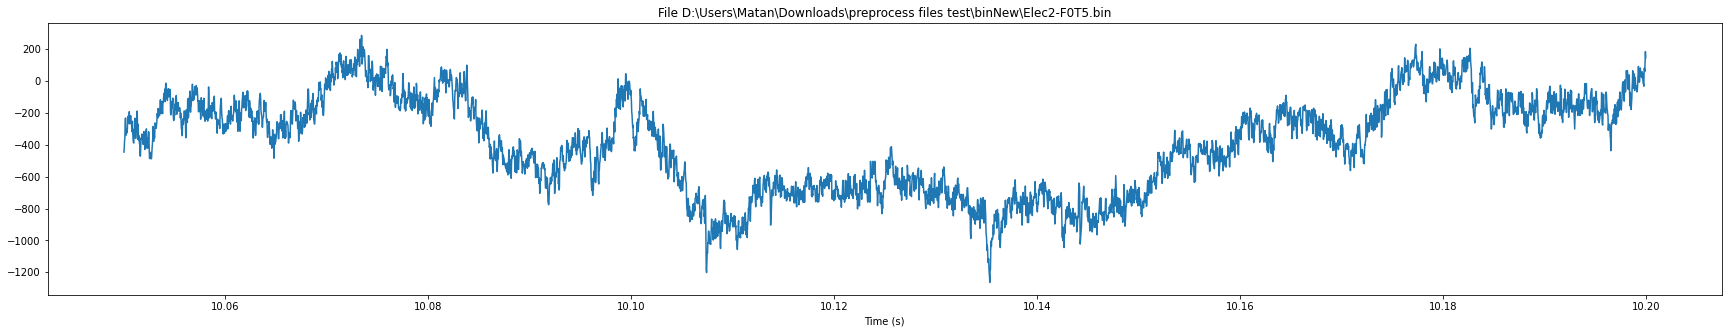

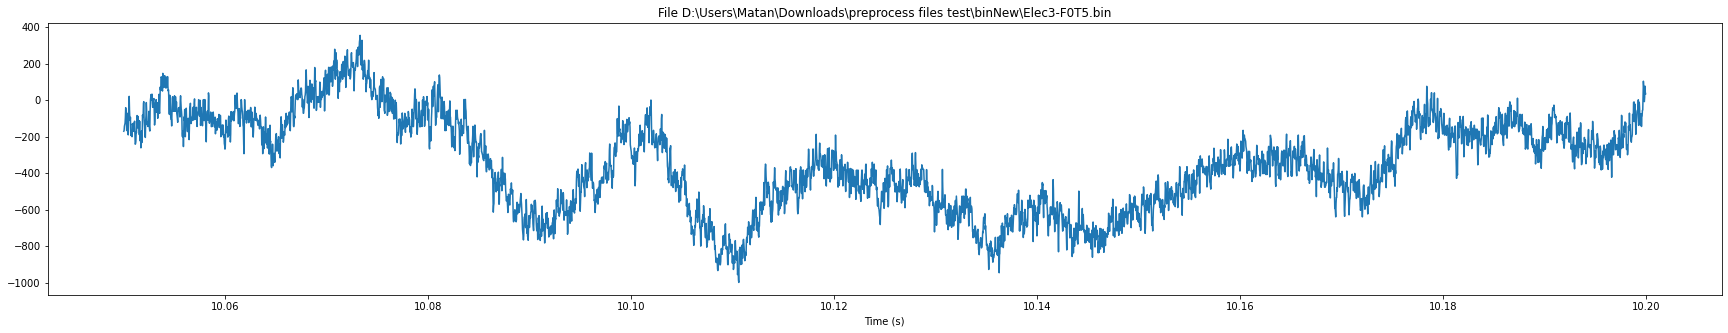

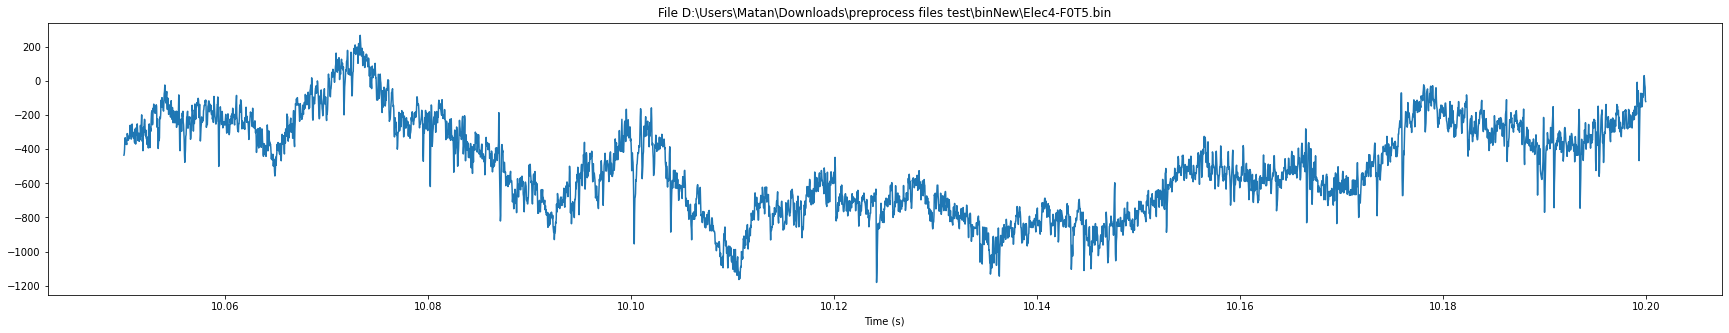

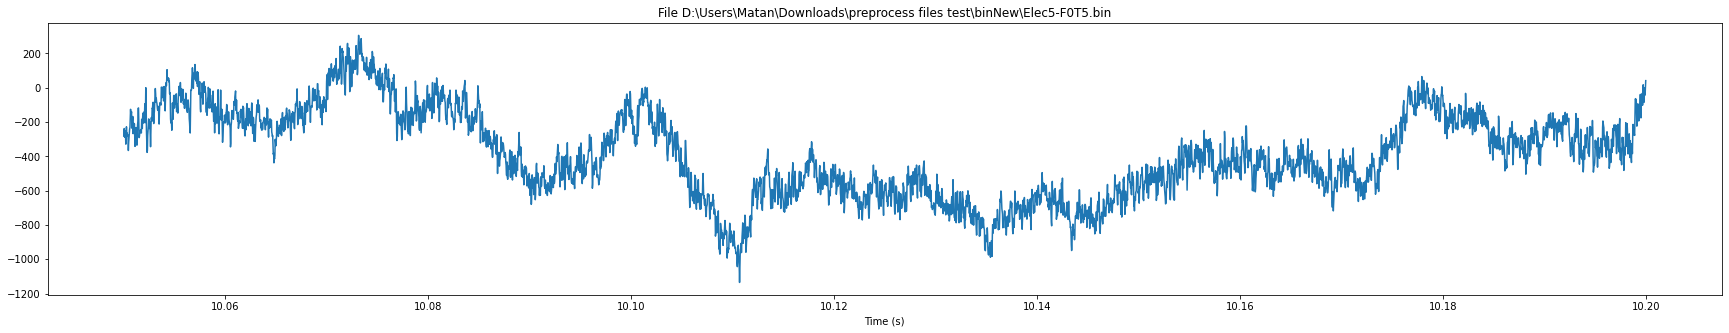

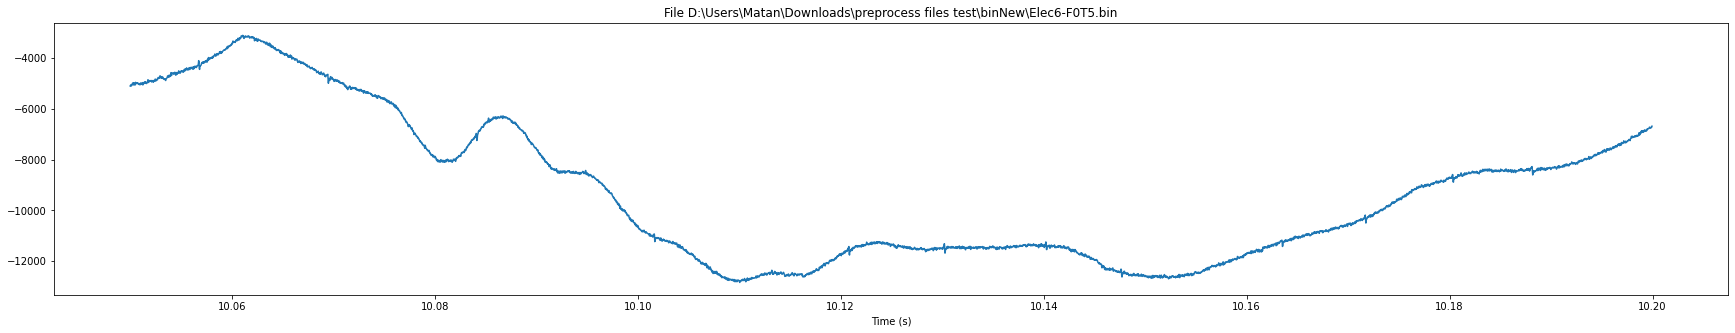

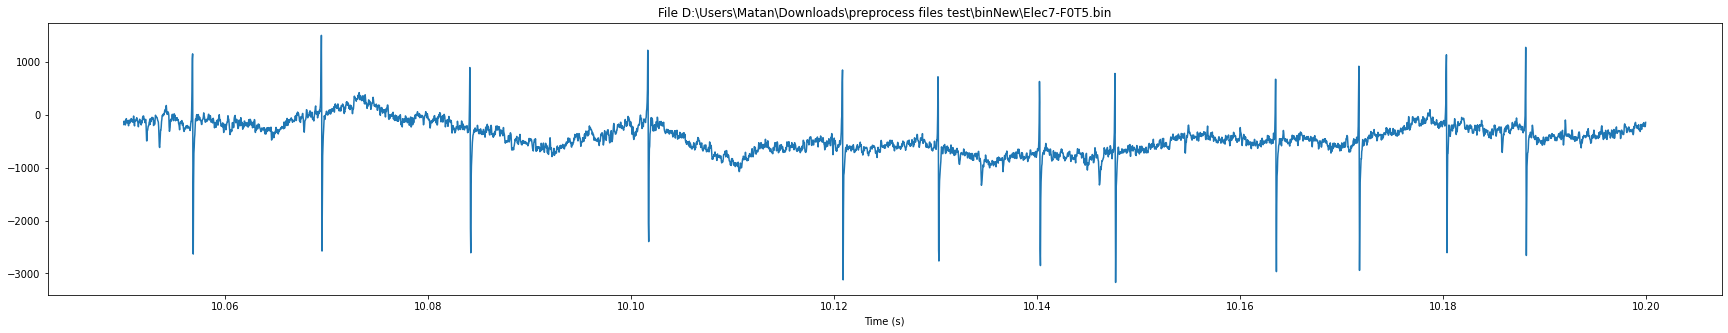

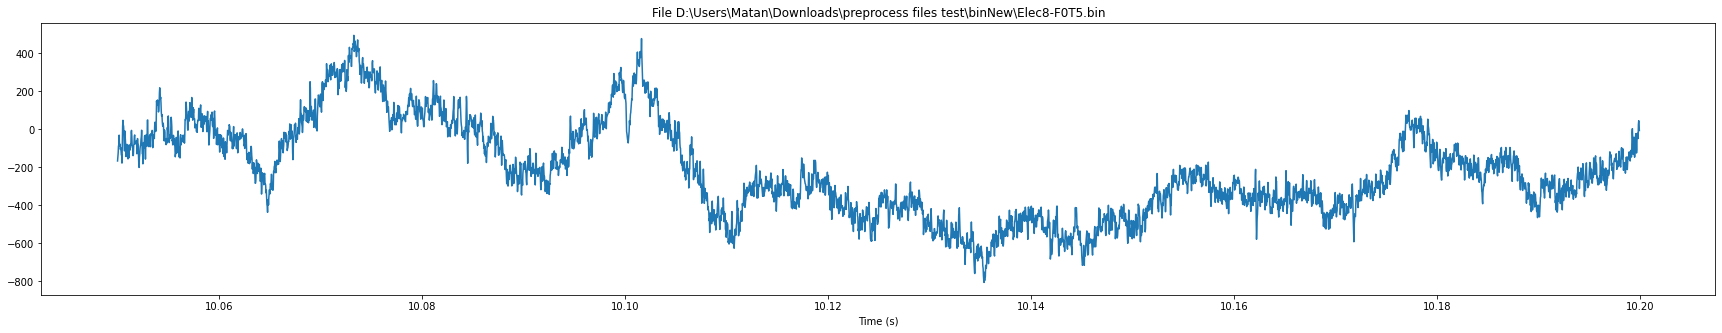

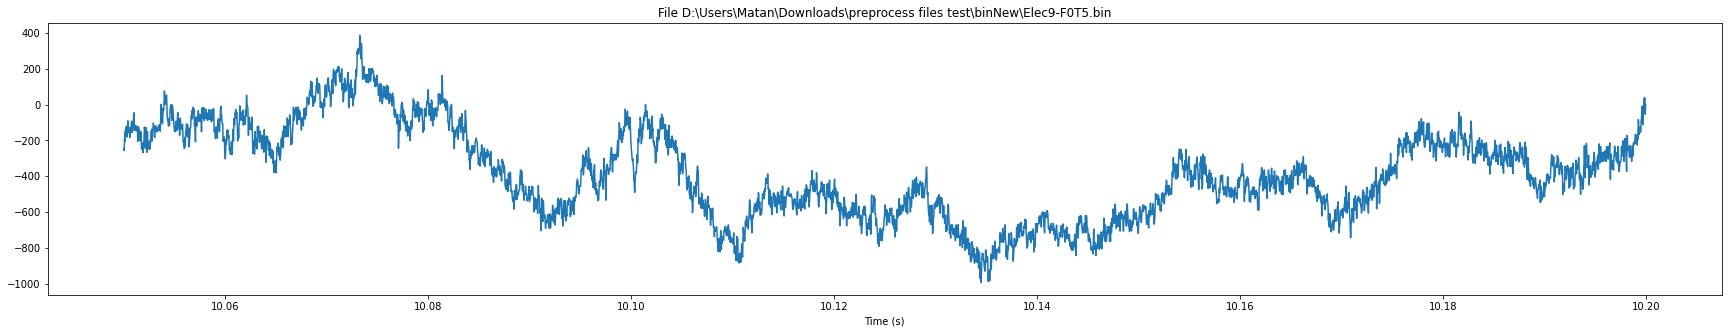

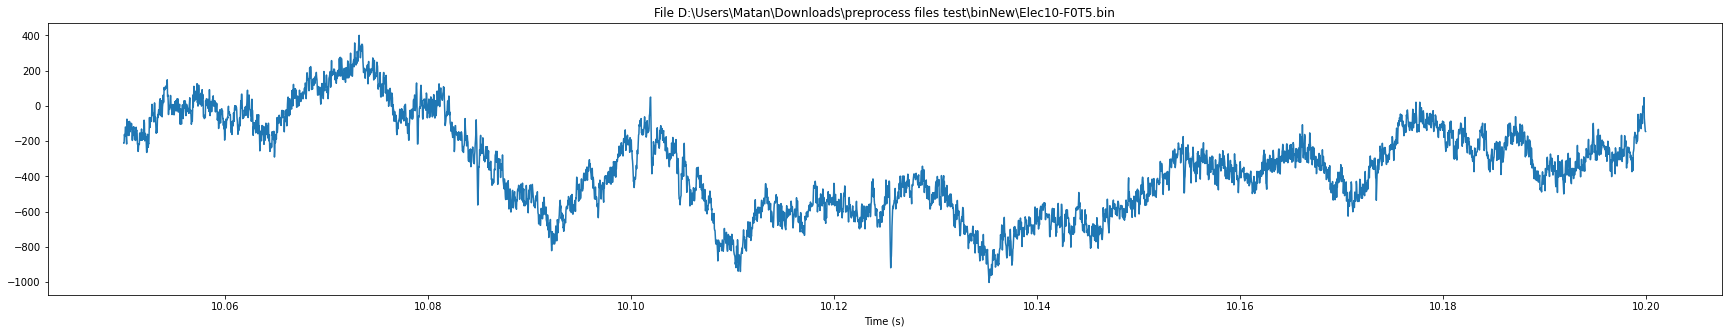

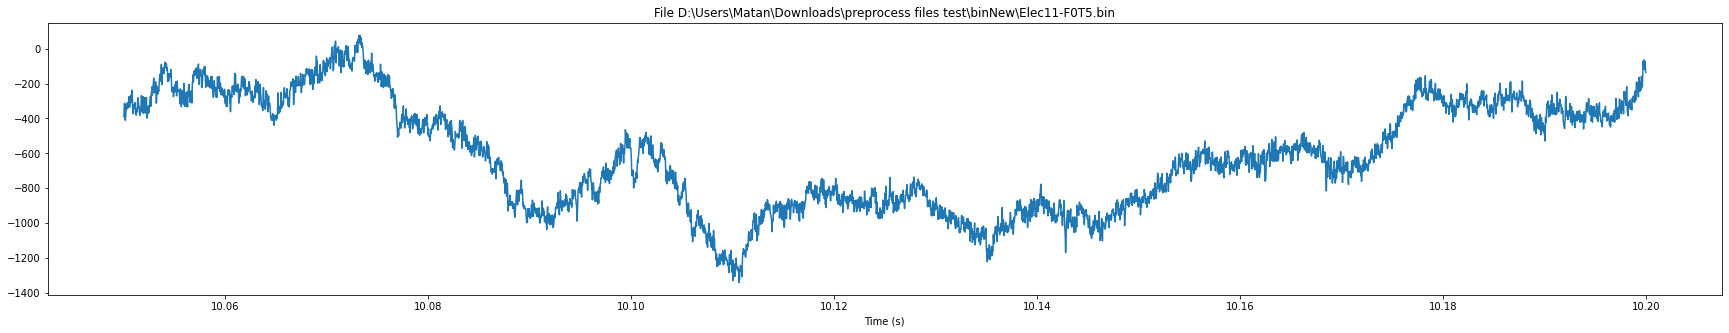

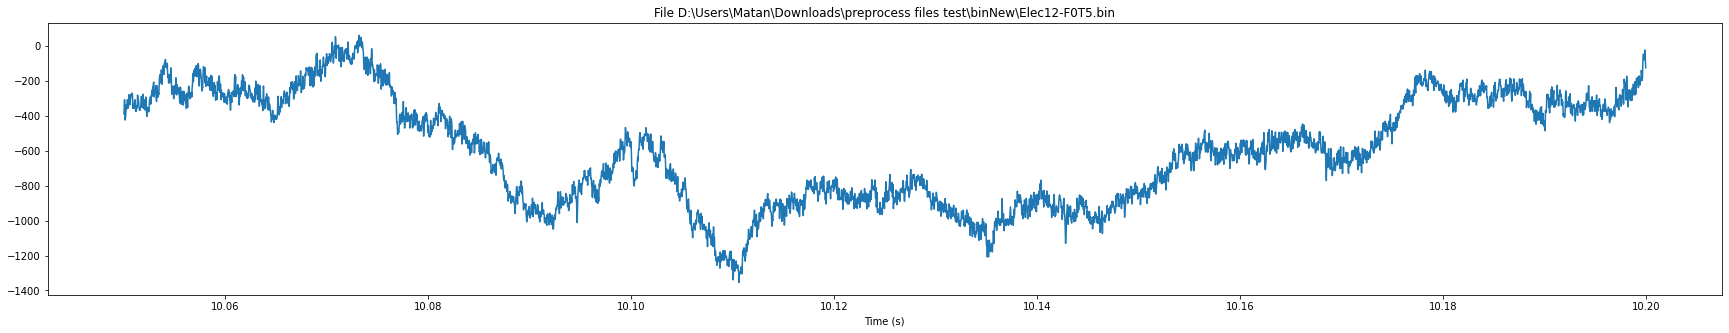

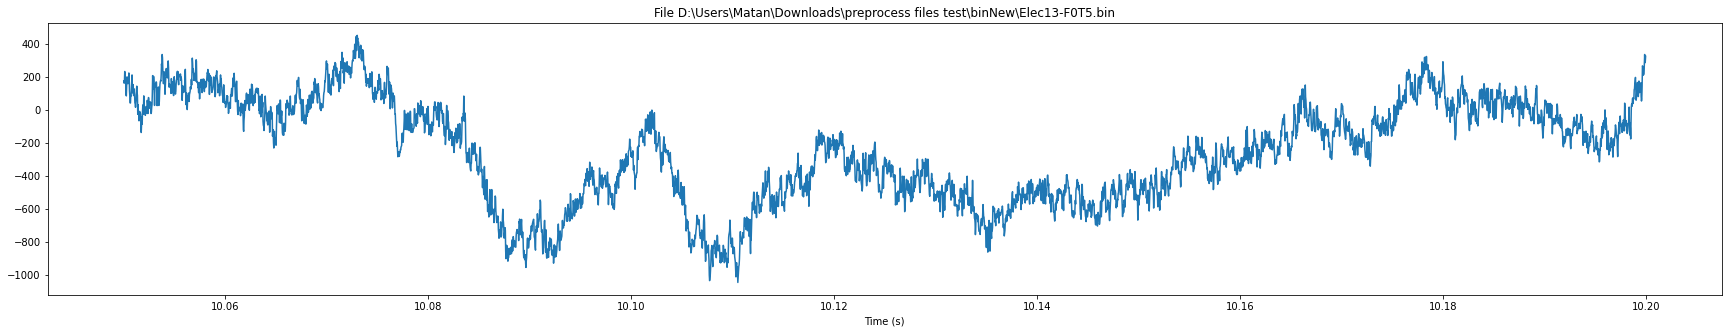

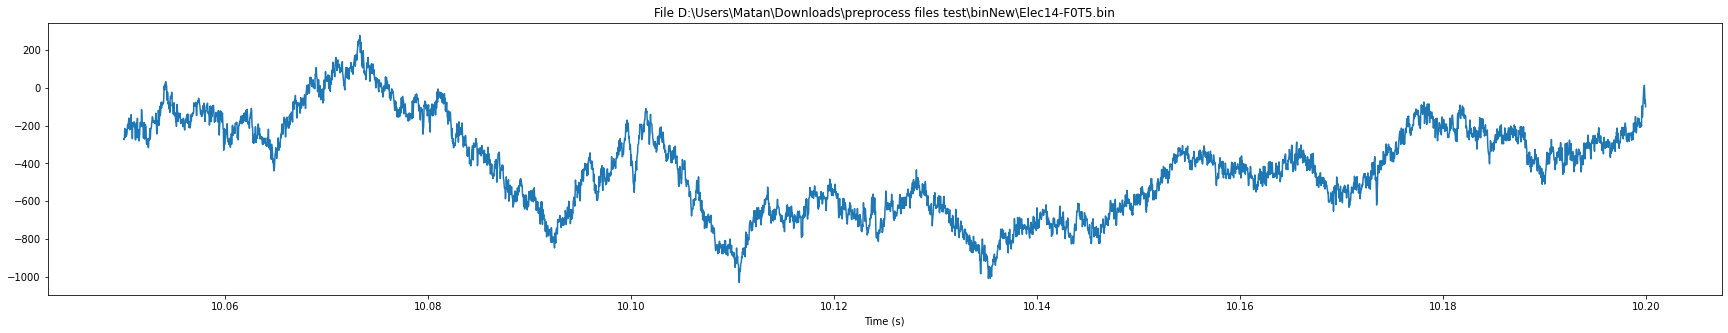

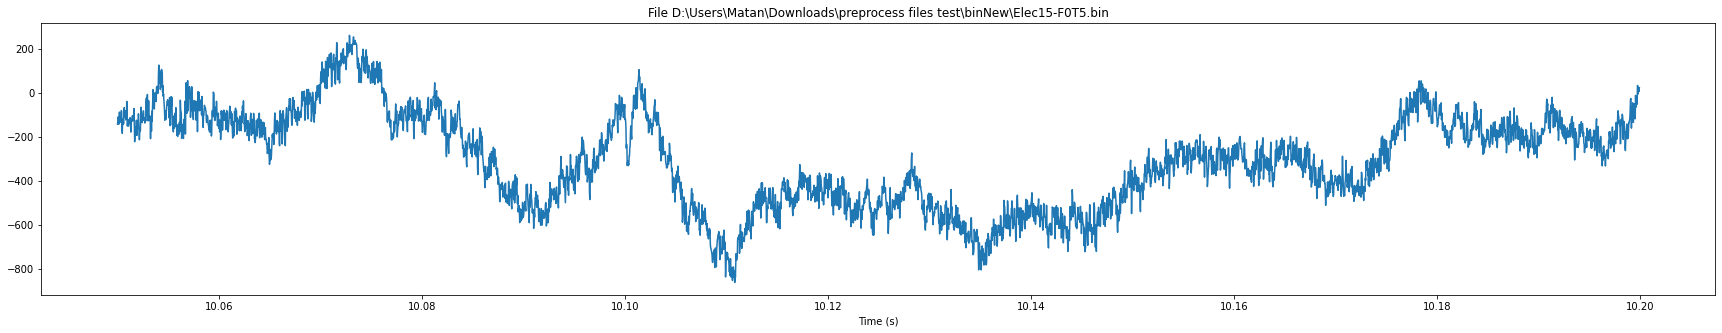

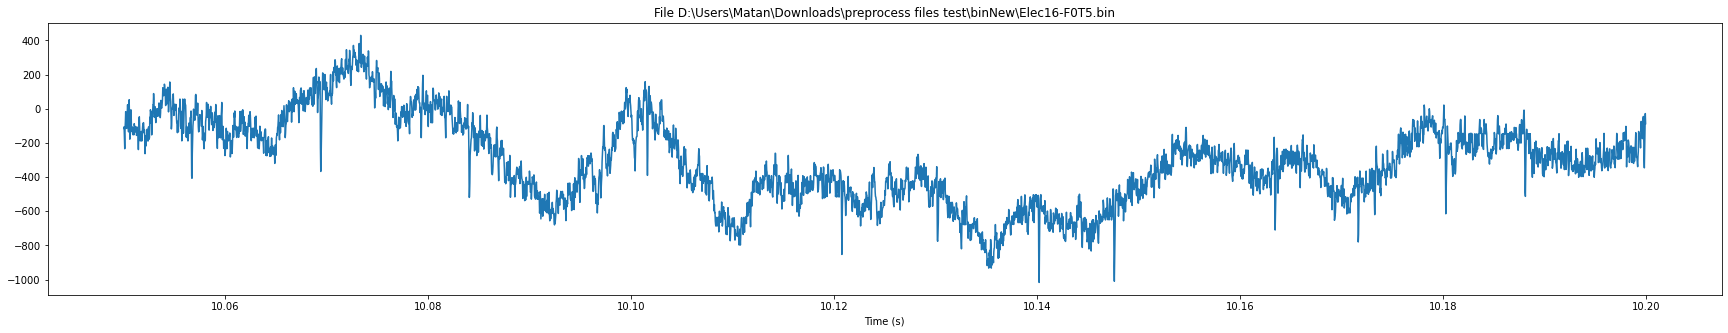

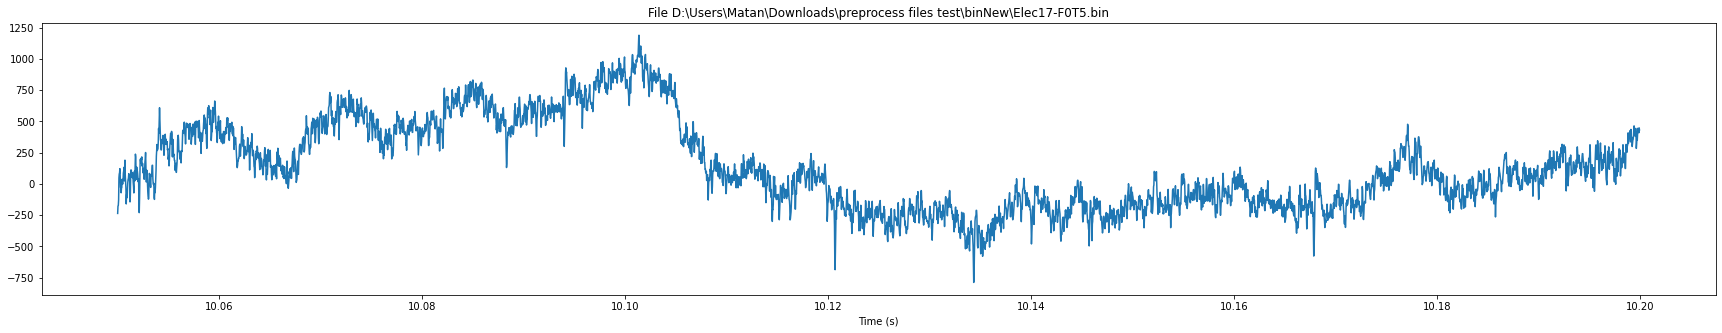

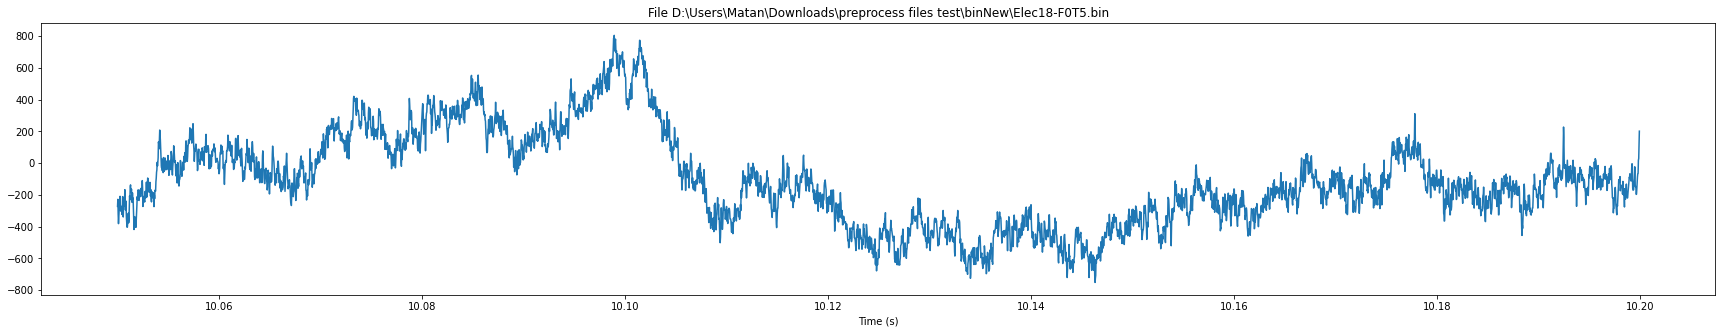

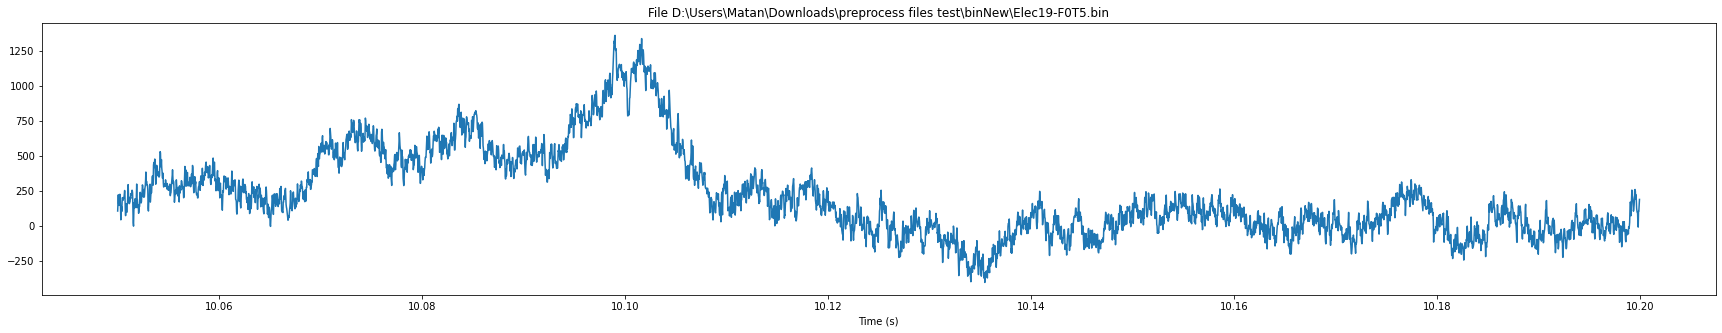

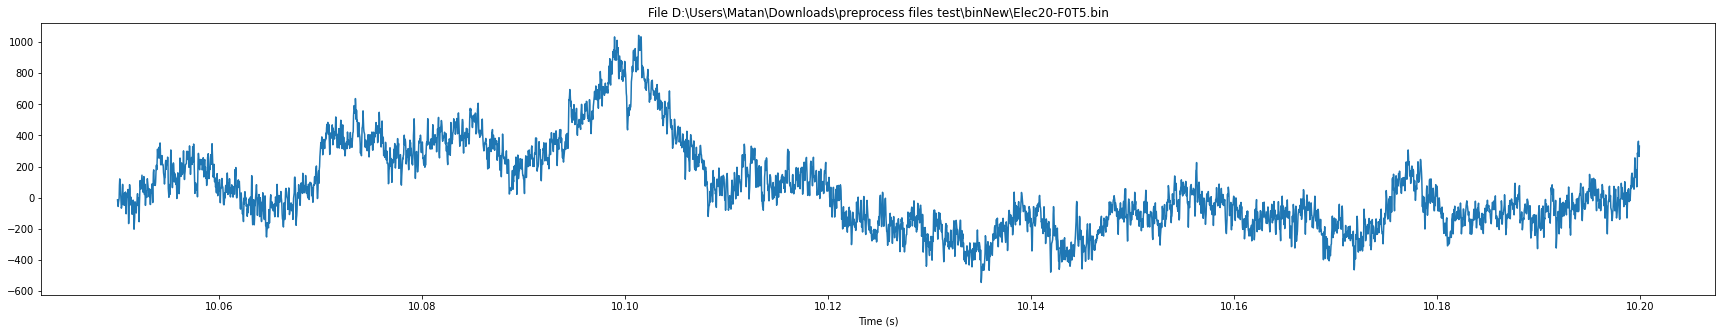

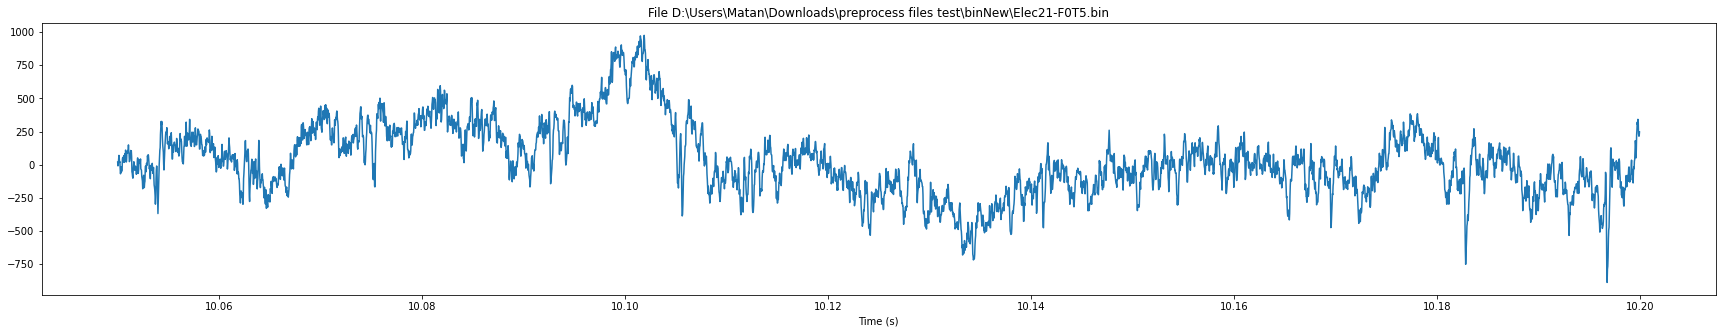

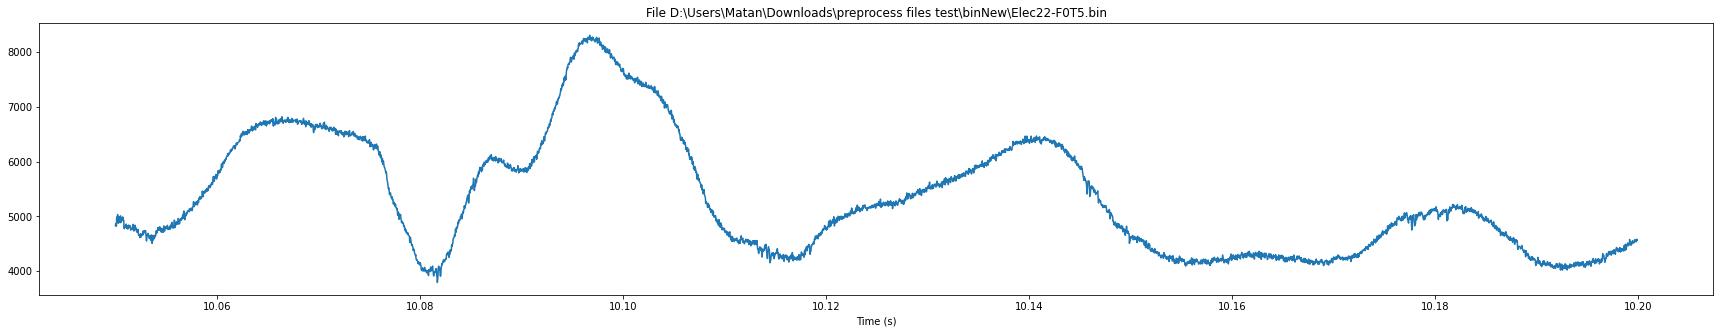

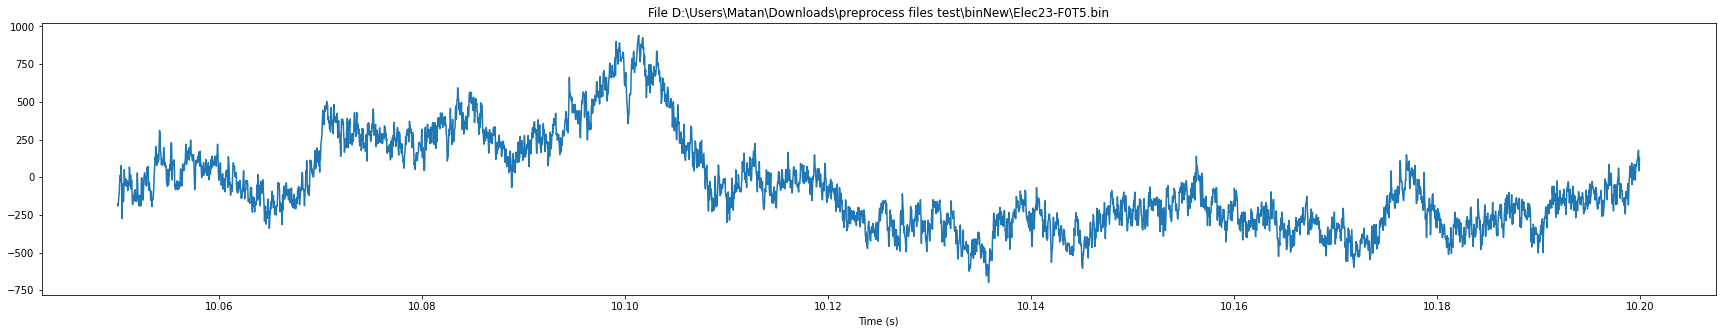

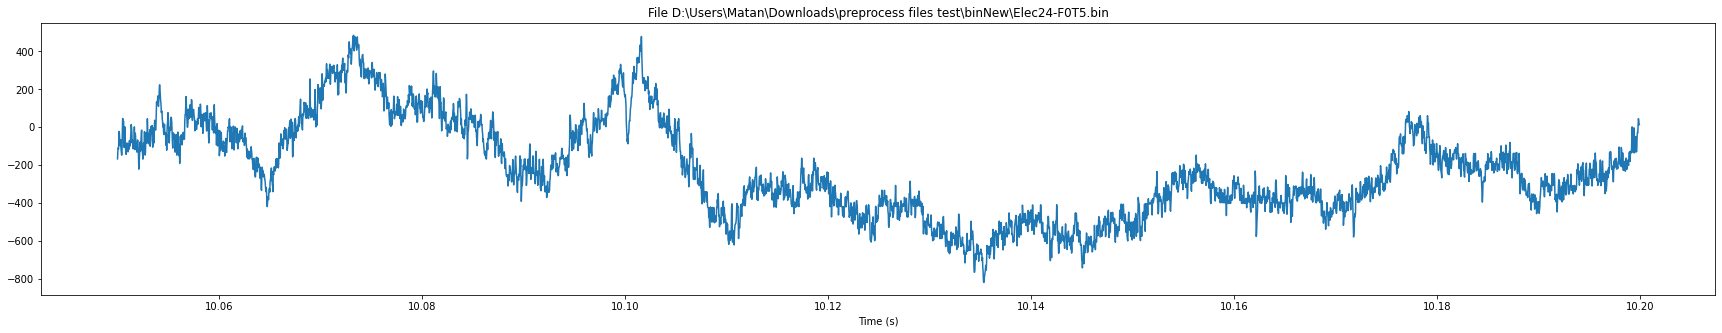

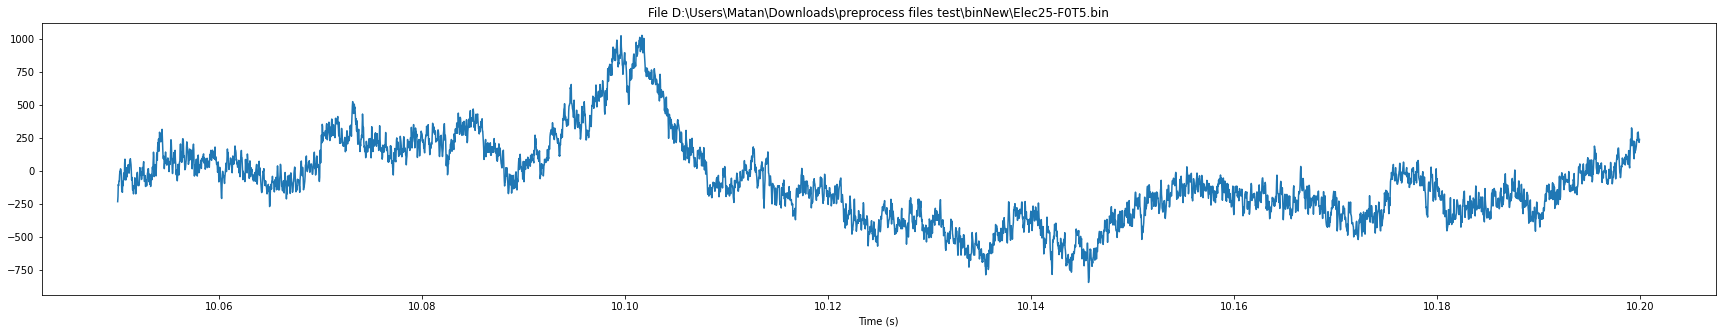

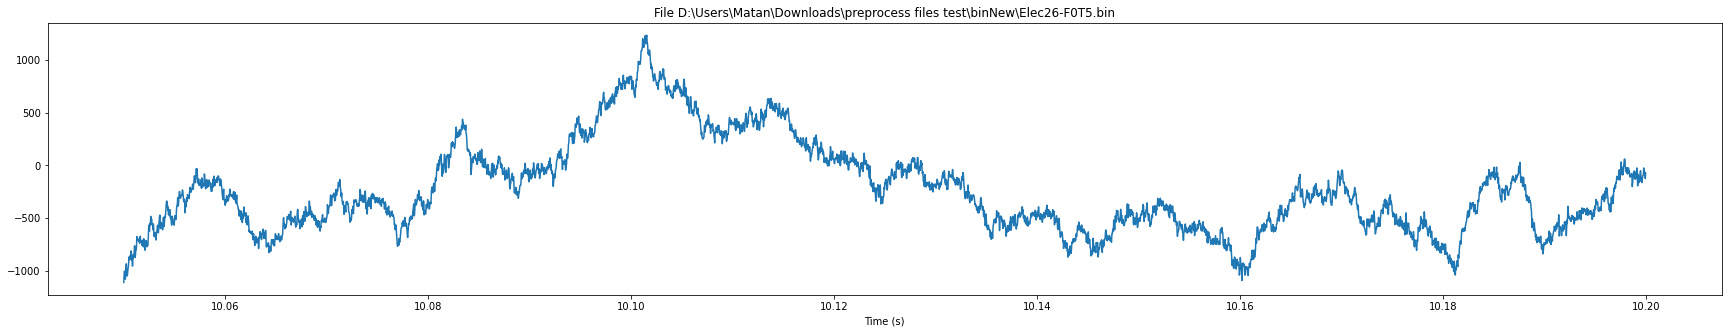

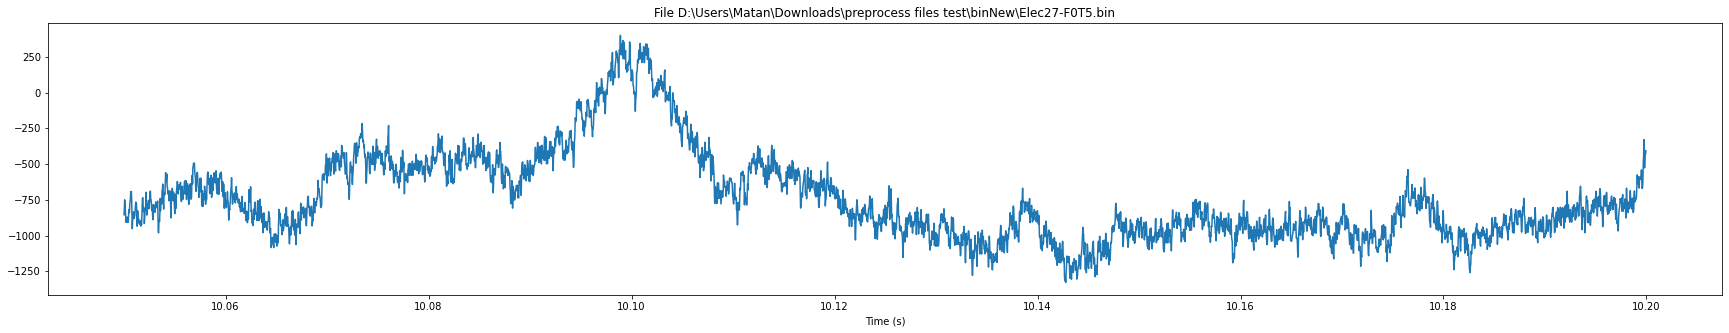

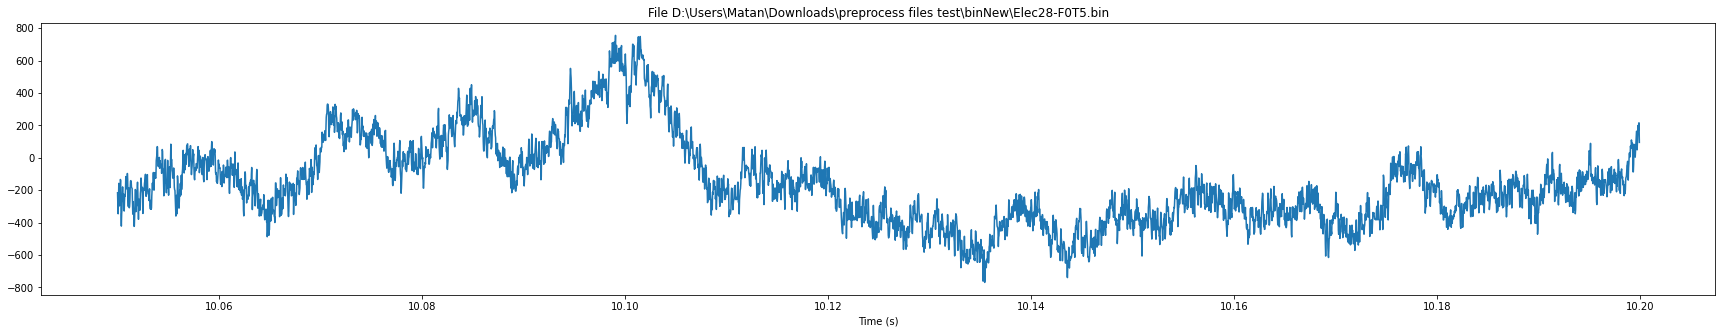

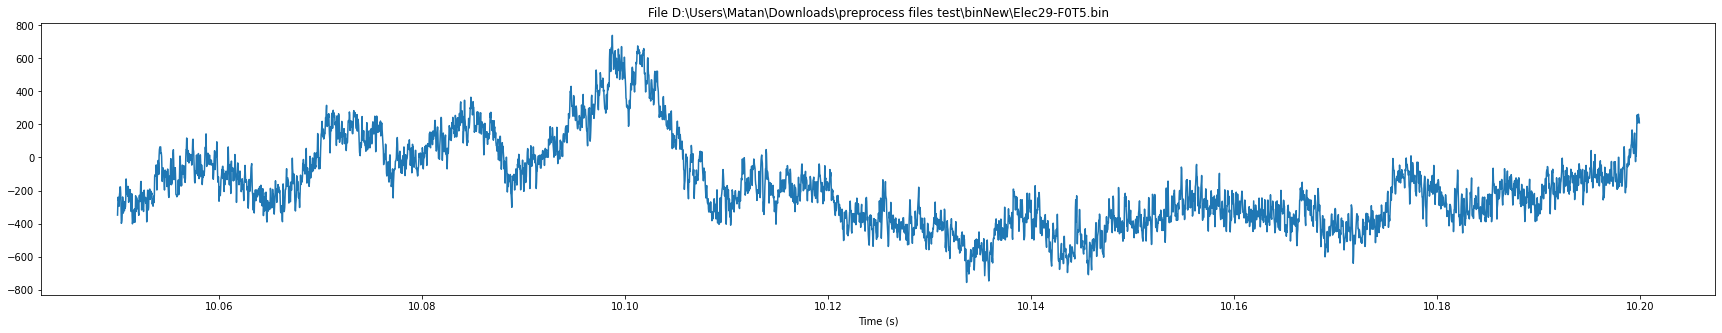

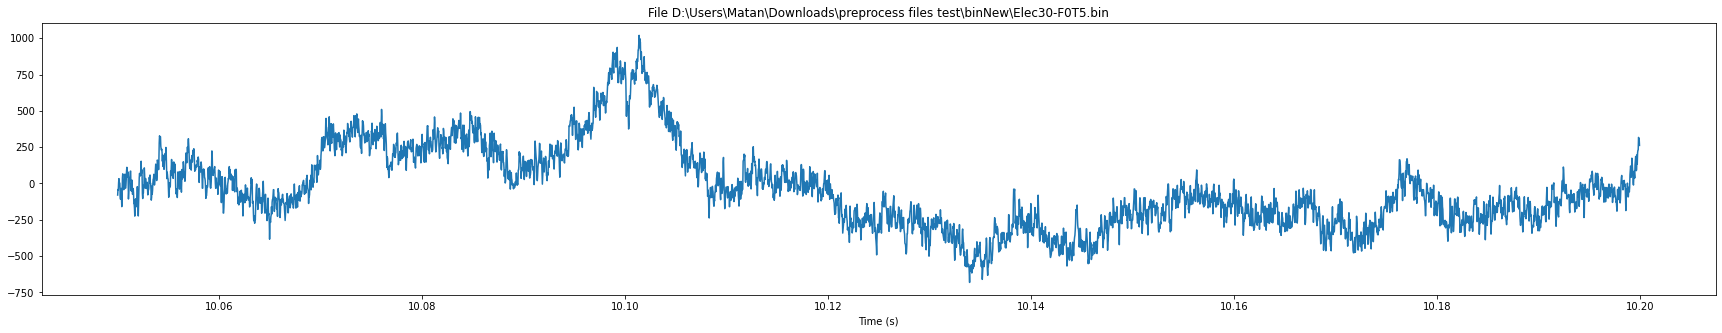

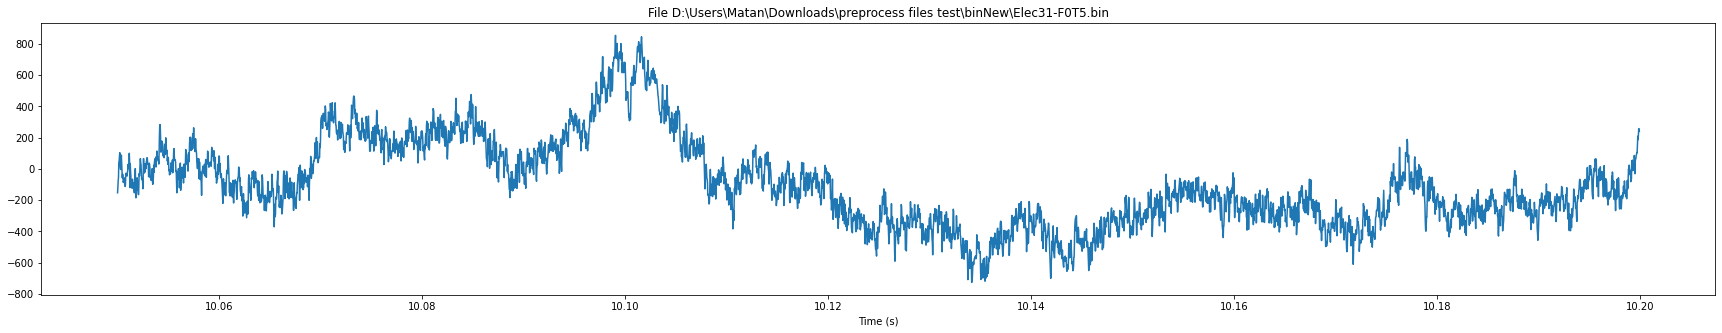

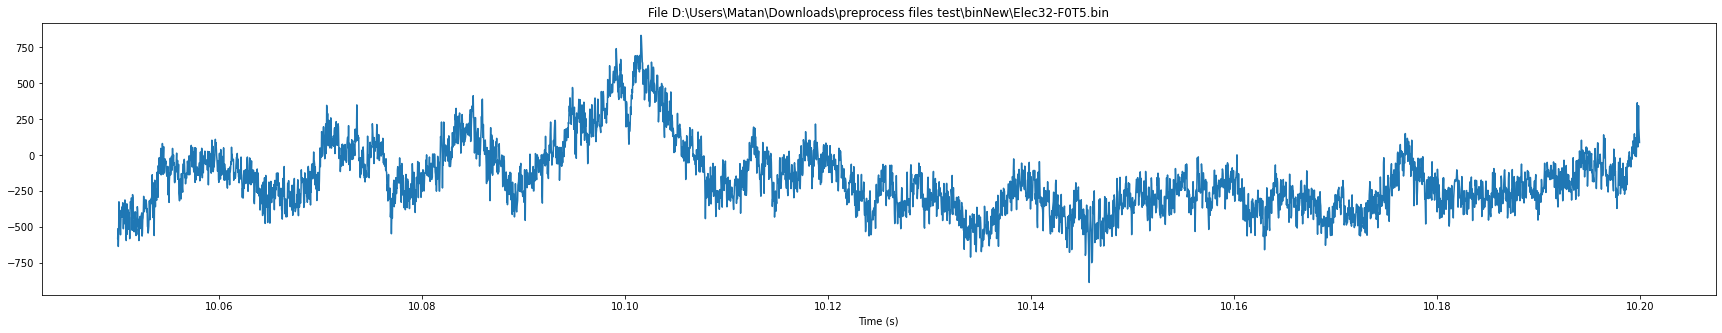

In [13]:
badElecList =[]
# Present all electrodes
for elec in elecList:
    fig, axes = pp.plotBin(os.path.join(inDir+"binNew","Elec"+str(elec)+rangeStr+".bin"), [10.05,10.2])
    fig.set_size_inches((30,5))

In [16]:
# Ask for each one if it's good or bad
for elec in elecList:
    result = input("Enter good/bad")
    if str(result)=="bad":
        badElecList.append(elec)
#update the DB
basicRow.update({"Bad electrodes":badElecList})
updateDB(basicRow)


ThemisDB.csv has been updated
